# Bootstrap (paramétrico)

In [1]:
# Bibliotecas
import numpy             as np                   # Biblioteca de álgebra Lineal
import matplotlib.pyplot as plt                  # Biblioteca para graficar
import seaborn           as sns                  # Biblioteca para graficar
from   scipy.stats       import norm, poisson    # Biblioteca con funciones de densidad, distribución, ...
import warnings                                  # Biblioteca para filrar mensajes no deseados

warnings.filterwarnings('ignore')       # Filtramos los mensajes no deseados
sns.set()                               # Ajustamos el tema por defecto para las graficas

## Ejemplo :: Distribución Normal

Sea $X_1, X_2, \ldots, X_n \sim Normal(\mu , \sigma^2)$, entonces deseamos encontrar un intervalo de confianza para $\hat{ \bar{X} } \sim Normal( \mu = \bar{X}, \sigma^2 = \frac{S^2}{n} )$

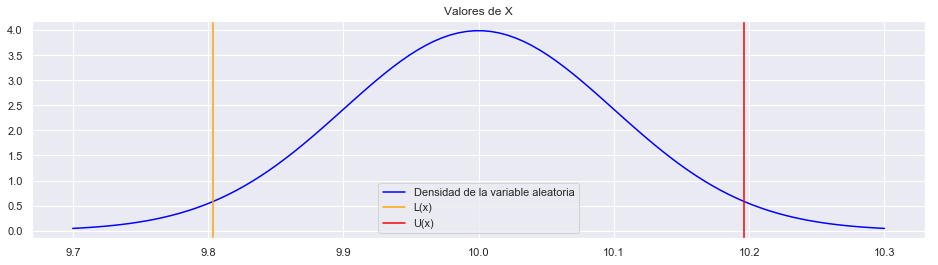

Cuantiles Reales    ::  [ 9.8040036 10.1959964]


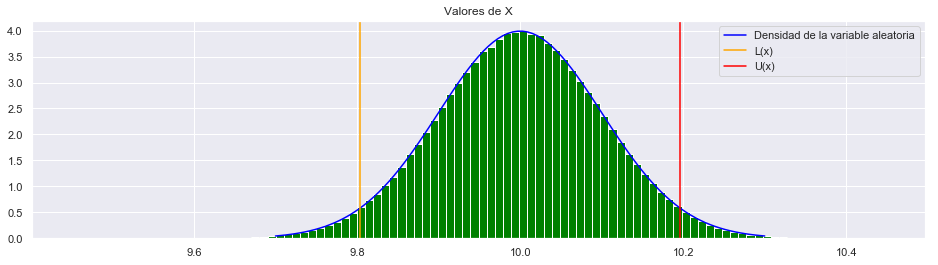

Cuantiles Simulados ::  [ 9.80385254 10.19575326]


In [2]:
###########################################################################################
# Parámetros 
###########################################################################################
num_simulaciones = 1000000     # Número de Simulaciones
tam_muestra      = 100       # Tamaño de la muestra
media            = 10        # Media de la variable aleatoria
desv_est         = 1         # Desviación estandar de la variable aleatoria
alpha            = 0.05      # Nivel de significancia
###########################################################################################
# Densidad Real
###########################################################################################
# Calculamos la función de densidad
x_barra          = media
sigma_2          = desv_est**2 / tam_muestra
valores_x        = np.linspace(start = x_barra-3*np.sqrt(sigma_2), stop = x_barra+3*np.sqrt(sigma_2), num = tam_muestra )
valores_y        = norm( loc = media, scale = np.sqrt(sigma_2) ).pdf( x = valores_x )
quantiles        = norm( loc = media, scale = np.sqrt(sigma_2) ).ppf( q = [alpha/2, 1-alpha/2] )
# Graficamos nuestros puntos
fig, ax1 = plt.subplots( nrows=1, ncols=1, figsize=(16,4) )
ax1.set_title("Valores de X")
ax1.plot( valores_x, valores_y , color = "blue", label = "Densidad de la variable aleatoria")
ax1.axvline(x=quantiles[0], color="orange", label = "L(x)")
ax1.axvline(x=quantiles[1], color="red",    label = "U(x)")
ax1.legend()
plt.show()
print("Cuantiles Reales    :: ", quantiles)
###########################################################################################
# Simulaciones / Boot
###########################################################################################
# Simulamos nuestros números pseudo-aleatorios
medias_simuladas = []
for sim in range(num_simulaciones):
    medias_simuladas.append( np.mean( np.random.normal( loc = media, scale = desv_est, size = tam_muestra ) ) )
quantiles = np.percentile( a = medias_simuladas, q = [100*alpha/2, 100-100*alpha/2] )
# Graficamos nuestros puntos
fig, ax1 = plt.subplots( nrows=1, ncols=1, figsize=(16,4) )
ax1.set_title("Valores de X")
ax1.hist( x=medias_simuladas, color="green", density=True, bins=100 )
ax1.plot( valores_x, valores_y , color = "blue", label = "Densidad de la variable aleatoria")
ax1.axvline(x=quantiles[0], color="orange", label = "L(x)")
ax1.axvline(x=quantiles[1], color="red",    label = "U(x)")
ax1.legend()
plt.show()
print("Cuantiles Simulados :: ", quantiles)